
# <span style="color:rgb(213,80,0)">Compute empirical and theoretical ARE(Me, Mean) under the normal distribution and the Student t.</span>

This file creates Figure 2.3.

## Theoretical ARE(Me, Mean) when the data are from the Normal distribution

Var(sample mean)/Var(sample median) Initial part of Section 2.1.2. For the final part of Section 2.1.2 see file areVarComparison.m.


In [1]:
close all
varmedian=1/(2*normpdf(0))^2;
varmean=1;
VarRatio=varmean/varmedian;
disp(['Theoretical ARE(Me,mean) under the normal distribution='  num2str(VarRatio)] )

Theoretical ARE(Me,mean) under the normal distribution=0.63662

## Empirical ARE(Me, Mean) when the data are from the Normal distribution

This section is not mentioned in the book


In [2]:
n=10000000;
nsimul=100; % Increare nsimul if you like greater precision
meandistr=zeros(nsimul,1);
mediandistr=zeros(nsimul,1);

parfor j=1:nsimul
    y=randn(n,1);
    meandistr(j)=mean(y);
    mediandistr(j)=median(y);
end

disp('Empirical ARE(Me, Mean) under the normal distribution=')

Empirical ARE(Me, Mean) under the normal distribution=

In [3]:
disp([num2str(nsimul) ' simulations using n=' num2str(n)])

100 simulations using n=10000000

In [4]:
disp(var(meandistr)/var(mediandistr))

    0.6376

## Empirical ARE(Me,mean) under the Student t_5

This section is not mentioned in the book


In [5]:
n=100;
nsimul=1000;
meandistr=zeros(nsimul,1);
mediandistr=zeros(nsimul,1);
% nu = degrees of freedom of Student T
nu = 5;

for j=1:nsimul
    y=trnd(nu, n,1);
    meandistr(j)=mean(y);
    mediandistr(j)=median(y);
end

disp(['Empirical ARE(Me, Mean) under t' num2str(nu)])

Empirical ARE(Me, Mean) under t5

In [6]:
disp([num2str(nsimul) ' simulations using n=' num2str(n)])

1000 simulations using n=100

In [7]:
disp(var(meandistr)/var(mediandistr))

    0.9683

## Compute Empirical ARE as function of degrees of freedom

In [8]:
n=100;
nsimul=50000;
nuall=2.1:0.1:10;
lnu=length(nuall);
VarRatioE=zeros(1,lnu);
VarRatioT=zeros(1,lnu);

meandistr=zeros(nsimul,1);
mediandistr=zeros(nsimul,1);
% nu = degrees of freedom of Student T
ij=0;
for nu=nuall
    ij=ij+1;
    parfor j=1:nsimul
        y=trnd(nu, n,1);
        meandistr(j)=mean(y);
        mediandistr(j)=median(y);
    end
    disp(['Degrees of freedom: ' num2str(nu)])
    VarRatioE(ij)=var(meandistr)/var(mediandistr);
end

Degrees of freedom: 2.1
Degrees of freedom: 2.2
Degrees of freedom: 2.3
Degrees of freedom: 2.4
Degrees of freedom: 2.5
Degrees of freedom: 2.6
Degrees of freedom: 2.7
Degrees of freedom: 2.8
Degrees of freedom: 2.9
Degrees of freedom: 3
Degrees of freedom: 3.1
Degrees of freedom: 3.2
Degrees of freedom: 3.3
Degrees of freedom: 3.4
Degrees of freedom: 3.5
Degrees of freedom: 3.6
Degrees of freedom: 3.7
Degrees of freedom: 3.8
Degrees of freedom: 3.9
Degrees of freedom: 4
Degrees of freedom: 4.1
Degrees of freedom: 4.2
Degrees of freedom: 4.3
Degrees of freedom: 4.4
Degrees of freedom: 4.5
Degrees of freedom: 4.6
Degrees of freedom: 4.7
Degrees of freedom: 4.8
Degrees of freedom: 4.9
Degrees of freedom: 5
Degrees of freedom: 5.1
Degrees of freedom: 5.2
Degrees of freedom: 5.3
Degrees of freedom: 5.4
Degrees of freedom: 5.5
Degrees of freedom: 5.6
Degrees of freedom: 5.7
Degrees of freedom: 5.8
Degrees of freedom: 5.9
Degrees of freedom: 6
Degrees of freedom: 6.1
Degrees of freedom: 6.2


## Plot the empirical ARE as function of degrees of freedom of Student T


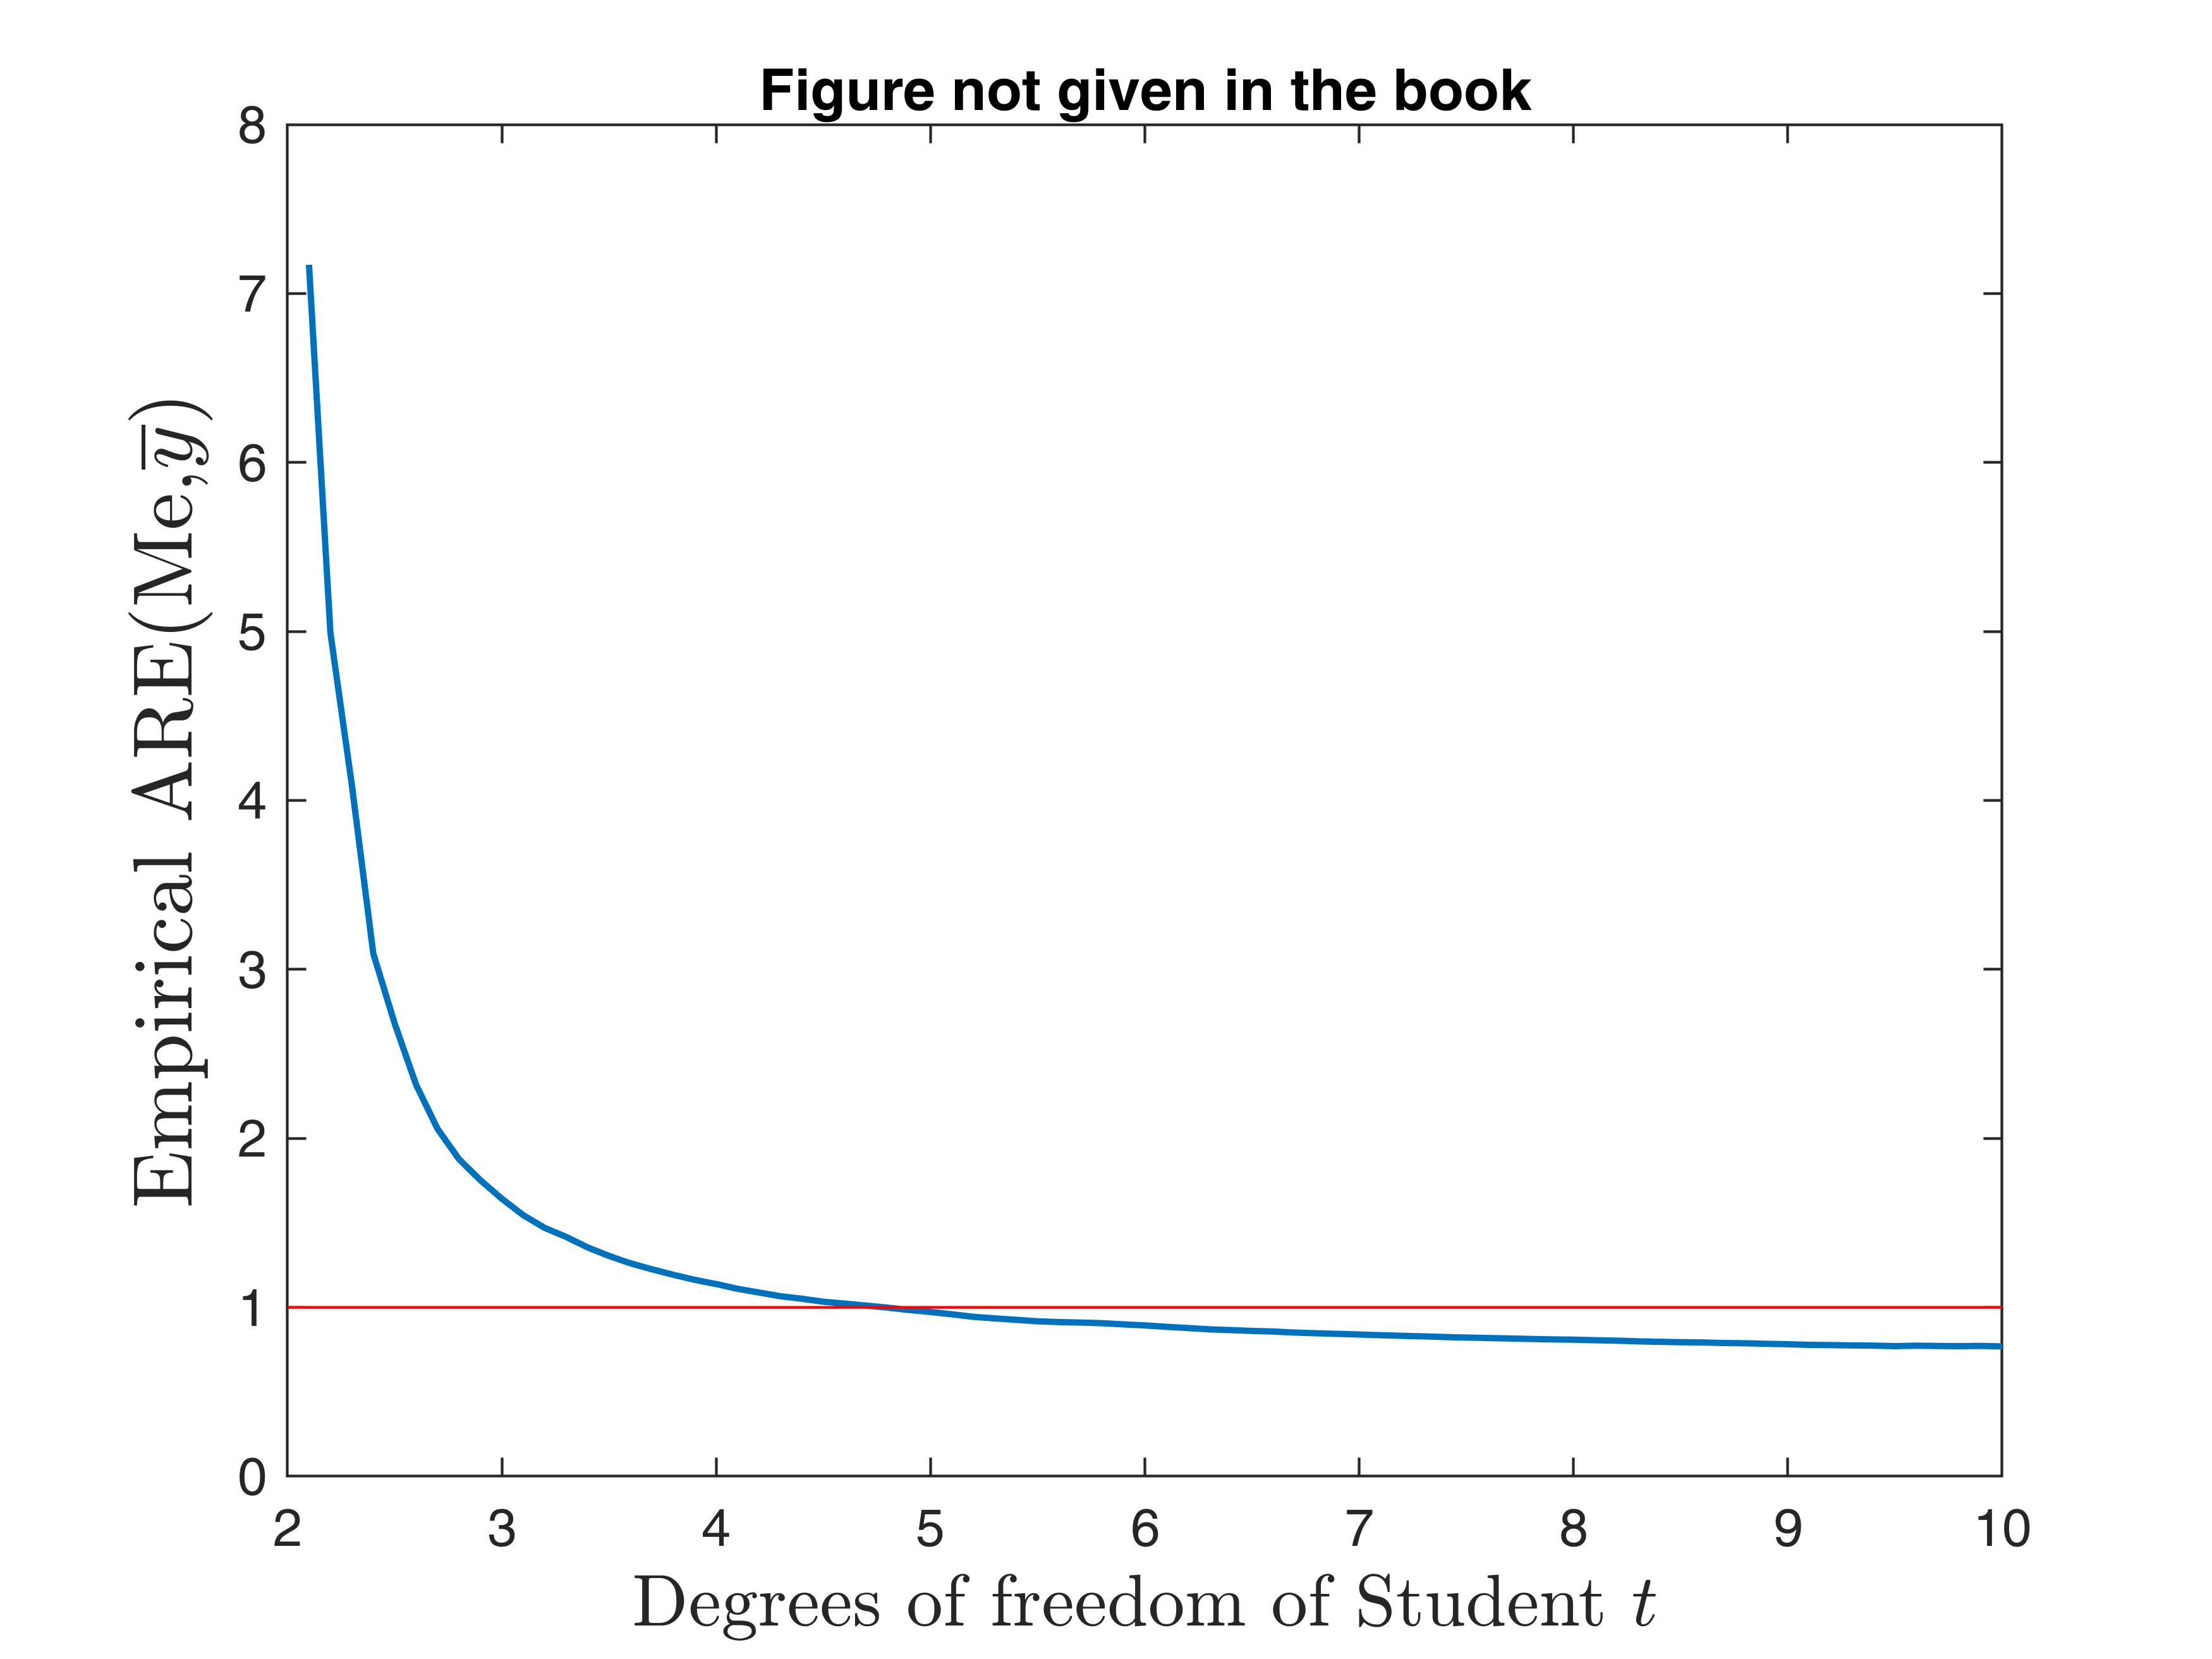

In [9]:
ld=1.2;
fs=16;
plot(nuall,smooth(VarRatioE),'LineWidth',ld)
hline=refline(0,1);
hline.Color = 'r';
xlabel('Degrees of freedom of Student $t$ ','FontSize',fs-2,'Interpreter','latex')
ylabel('Empirical ARE(Me, $\overline y$ )','Interpreter','latex','FontSize',fs)
title('Figure not given in the book')

## Create input for Figure 2.3

Theoretical ARE curve as function of degrees of freedom Var(sample mean)/Var(sample median) nu = degrees of freedom of Student T


In [10]:
ij=0;
for nu=nuall
    ij=ij+1;
    varmedian=1/(2*tpdf(0,nu))^2;
    varmean=nu/(nu-2);
    VarRatioT(ij)=varmean/varmedian;
end

## Create Figure 2.3


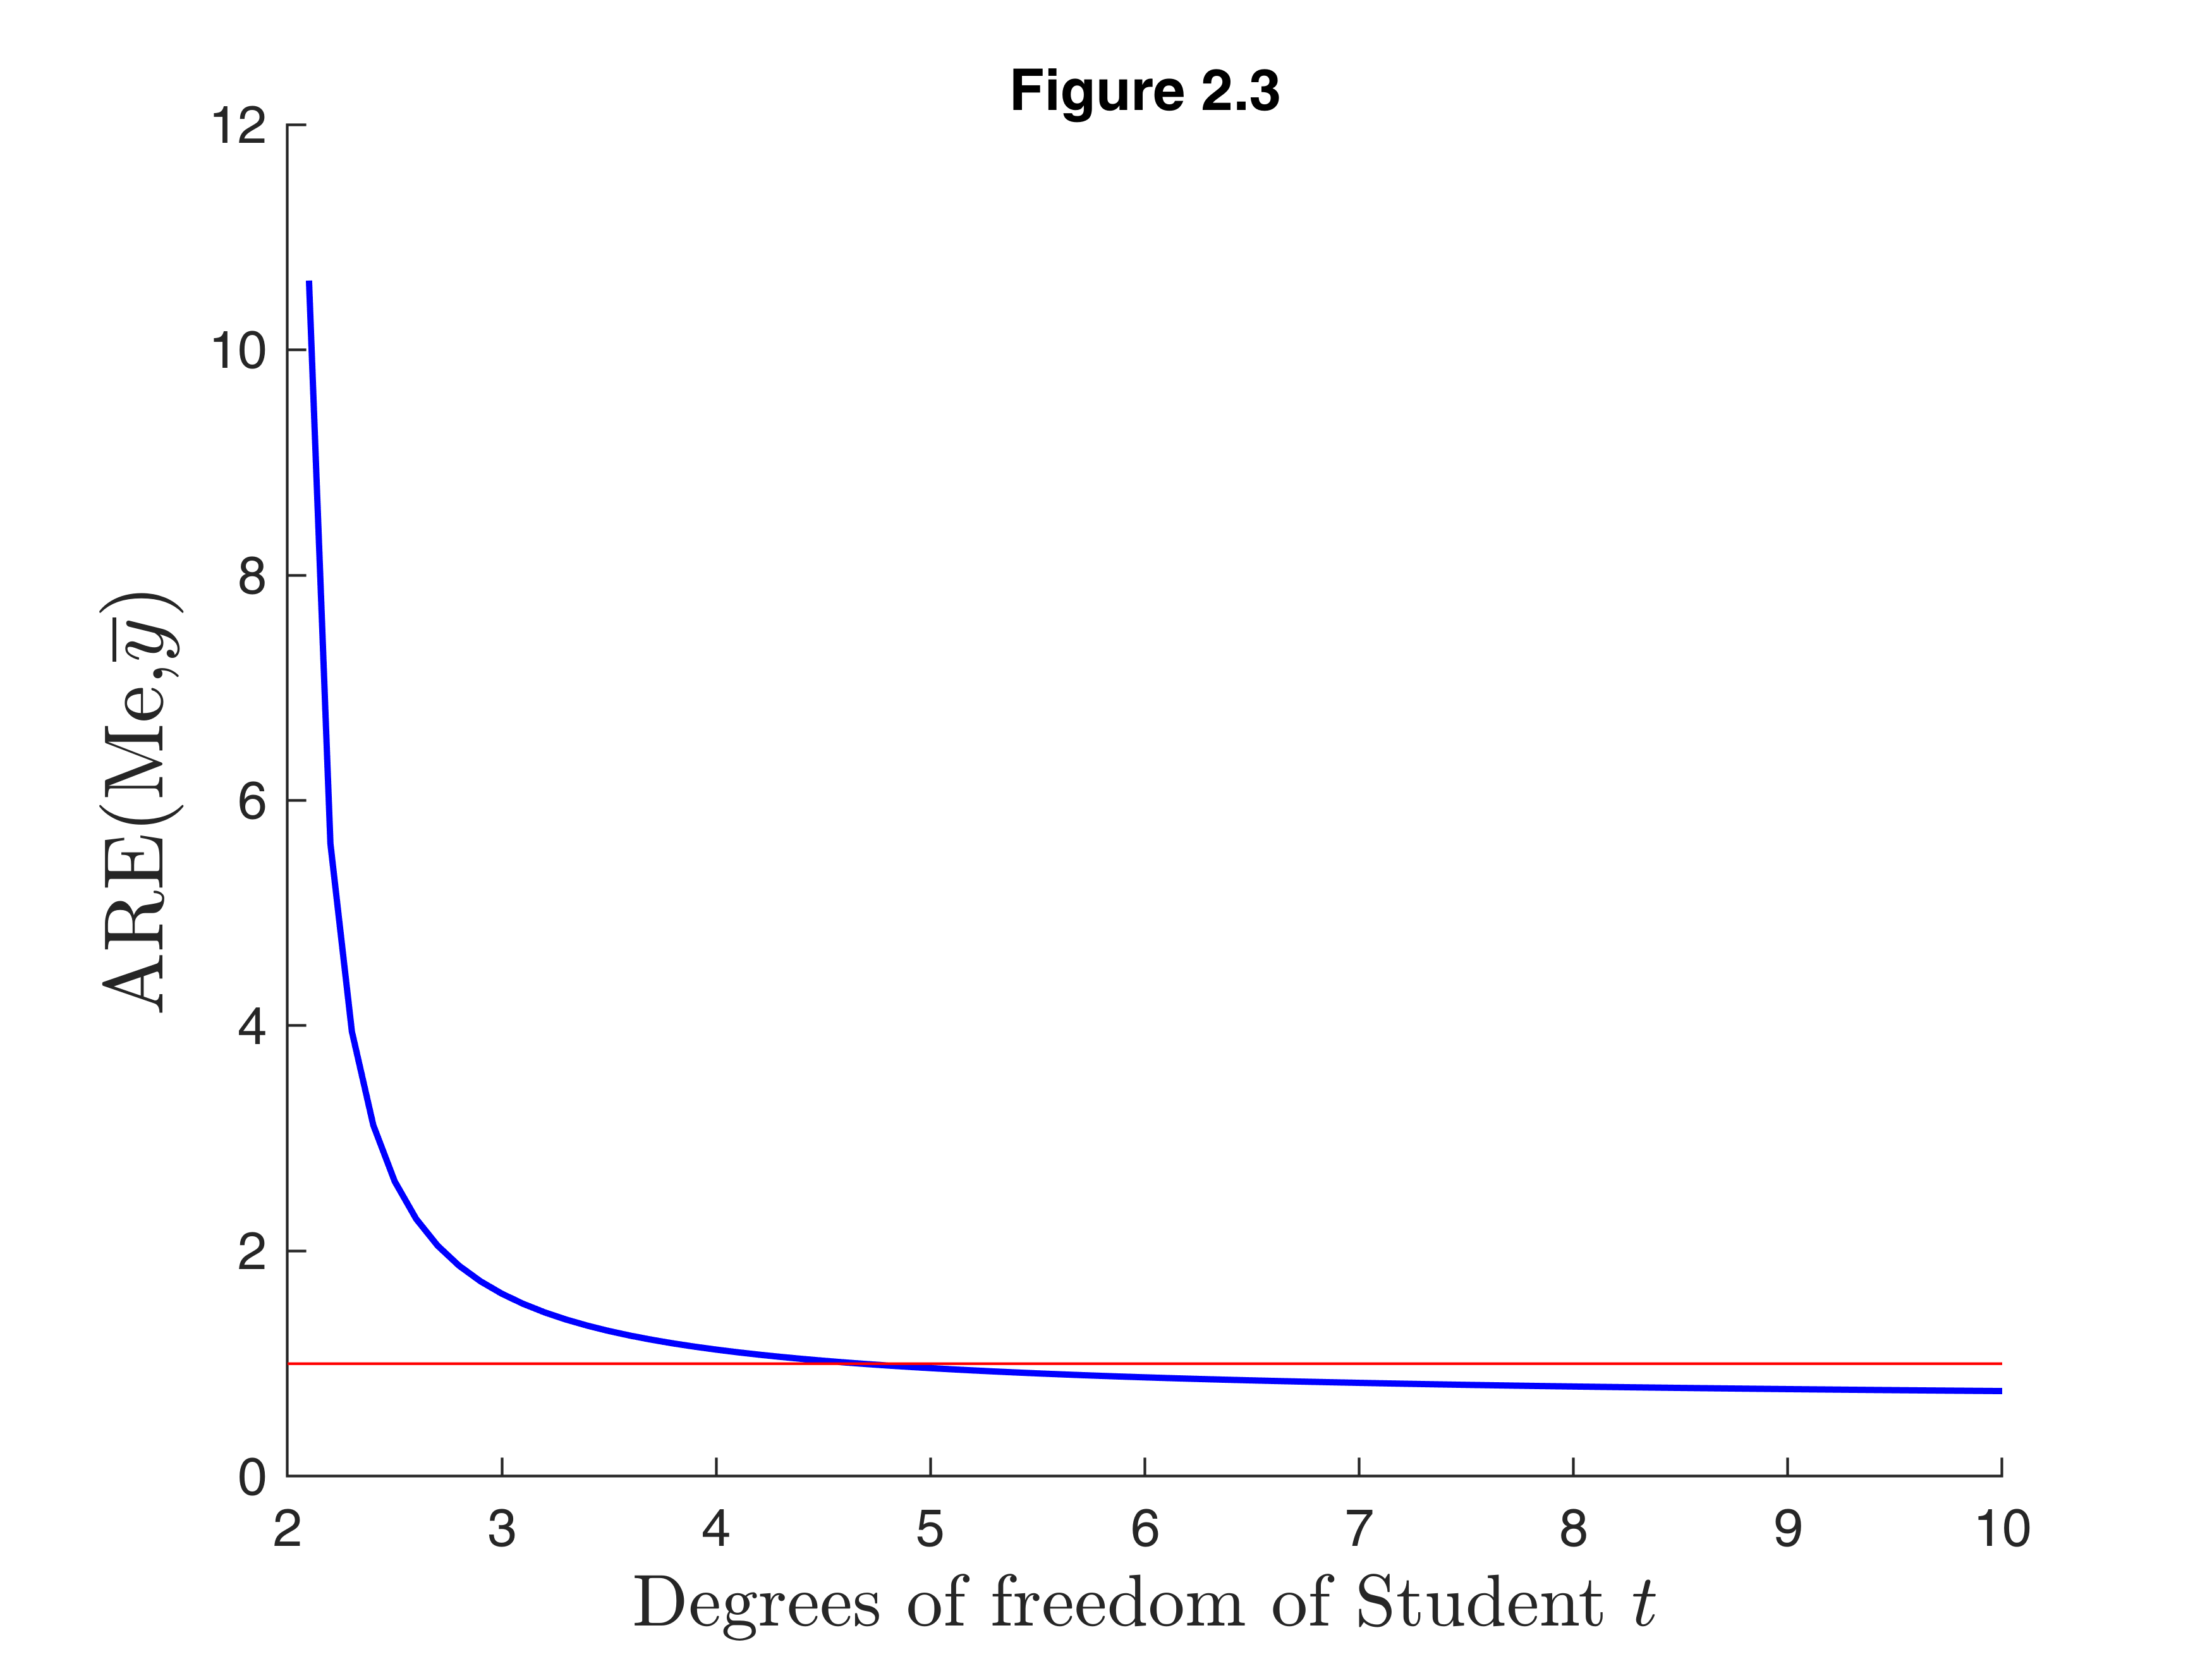

In [11]:
ld=1.2;
fs=16;
figure
hold('on')
% plot(nuall,(VarRatioE),'r','LineWidth',ld)
plot(nuall,VarRatioT,'b', 'LineWidth',ld)

hline=refline(0,1);
hline.Color = 'r';
xlabel('Degrees of freedom of Student $t$ ','FontSize',fs-2,'Interpreter','latex')
ylabel('ARE(Me, $\overline y$ )','Interpreter','latex','FontSize',fs)
title('Figure 2.3')
set(gcf,"Name",'Figure 2.3')

## ARE for selected degrees of freedom

In [12]:
nusel=3:5; % degrees of freedom selected
[~,posnusel]=intersect(nuall,nusel);
VarRatioTsel=flip(VarRatioT(posnusel));
rownam="t_"+nusel+" ARE(Me,mean)";
VarRatioTselt=array2table(VarRatioTsel',"RowNames",rownam, ...
    "VariableNames","ARE for selected degrees of freedom");
disp(VarRatioTselt)

                        ARE for selected degrees of freedom
                        ___________________________________
    t_3 ARE(Me,mean)                  0.96067              
    t_4 ARE(Me,mean)                    1.125              
    t_5 ARE(Me,mean)                   1.6211

In [13]:

prin=0;
if prin==1
    % print to postscript
    print -depsc AREstudT.eps;
end

%InsideREADME